In [1]:
from astroquery.sdss import SDSS
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import glob

In [2]:
data = fits.getdata('bcg_paper.fits')

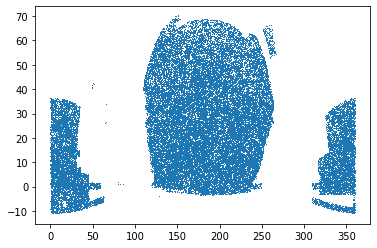

In [3]:
plt.plot(data['ra'], data['dec'],',')

In [6]:
#get the XID from ra, dec:

pos = SkyCoord(data['ra'][0]*u.deg, data['dec'][0]*u.deg, frame='icrs')
xid = SDSS.query_region(pos, spectro=True)
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7,bytes4
0.00957663670101283,5.28826023542935,1237678777941229794,7754,301,4,314,0.1693607,4415,55831,476,4970979028422860800,v5_10_0,BOSS


In [ ]:
#If the instrument is BOSS, then the download would have error:
sp = SDSS.get_spectra(matches=xid)

In [8]:
#So we have to change it manually from BOSS to EBOSS:
if xid['instrument'][0] == 'BOSS':
    xid.remove_column('instrument')
    xid.add_column(name='instrument', col=['EBOSS'])

sp = SDSS.get_spectra(matches=xid)

In [9]:
sp[0].info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     125   ()      
  1  COADD         1 BinTableHDU     26   4638R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPALL         1 BinTableHDU    488   1R x 236C   [27A, 14A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 7A, 7A, 16A, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 16A, 9A, 12A, E, E, E, E, E, E, E, E, J, E, E, J, J, 6A, 21A, E, 35E, K, 19A, 19A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D, D, D, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5

In [10]:
sp[0][2].data

FITS_rec([('boss', 'boss12', 'good', 11.5951, 11.5951, 0, 0, 5400., 1, 0., -221.5387, -50.62589, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 520576, 1, [  2.6311483,  19.274355 ,  66.05082  , 106.61932  , 159.39763  ], [ 6.9308333 , 13.546084  ,  3.0381854 ,  1.204563  ,  0.11860835], 4415, 10843, 55831, 476, 'v5_10_0', 'v5_10_0', 'GALAXY', 0.00957346, 5.2882663, 'GALAXY', '', 0.16936065, 2.4297384e-05, 1.0824566, 4458, 2.3173304, 'spEigenGal-56436.fits', [ 0,  1,  2,  3, -1, -1, -1, -1, -1, -1], 3, [  0.09564251,   0.4437394 ,   1.8416306 ,   1.1205045 ,  -5.078499  ,  16.055653  , -10.295775  ,   0.        ,   0.        ,   0.        ], 289.88113, 10.113728, 0., 0., 1545.4971, 2168., 1943, 3601.6375, 10346.655, 0.4465, 0, [ 2.1975343, 12.710815 , 26.641495 , 34.45971  , 29.667086 ], 24.187588, 0.99154025, [0.31534153, 0.05599104, 0.00649496, 0.00156775, 0.00067189, 0.00044793, 0.        , 0.        , 0.        , 0.        ], [0.16147816, 0.02530795, 0.00223964, 0.00044793, 0.00044793, 0.0004479

In [11]:
sp[0][1].data

FITS_rec([(25.031816, 3.5511, 0.08486009, 0, 0, 1.5010426 , 15.054806 ,  2.3250198),
          (19.694818, 3.5512, 0.        , 0, 0, 1.5011941 , 14.717628 ,  2.3402116),
          (14.356793, 3.5513, 0.09341491, 0, 0, 1.5013392 , 14.091303 ,  2.384717 ),
          ...,
          (23.717148, 4.0146, 0.10242444, 0, 0, 0.8741731 ,  6.891204 , 18.775074 ),
          (18.569954, 4.0147, 0.06044683, 0, 0, 0.8746059 , 14.7481785, 18.865267 ),
          (10.170005, 4.0148, 0.04416137, 0, 0, 0.87503964, 25.922297 , 18.946262 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

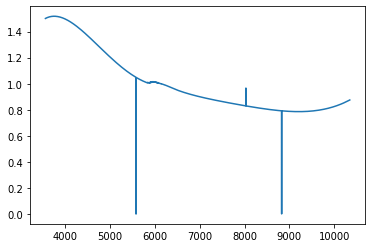

In [12]:
plt.plot(10**sp[0][1].data['loglam'], sp[0][1].data['wdisp'])

/var/folders/wt/df3t278s547730f3b_zd0ds40000gn/T/ipykernel_66975/2410420112.py:4: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(10**sp[0][1].data['loglam'], 1./sp[0][1].data['ivar']**0.5)


(-4.0, 24.0)

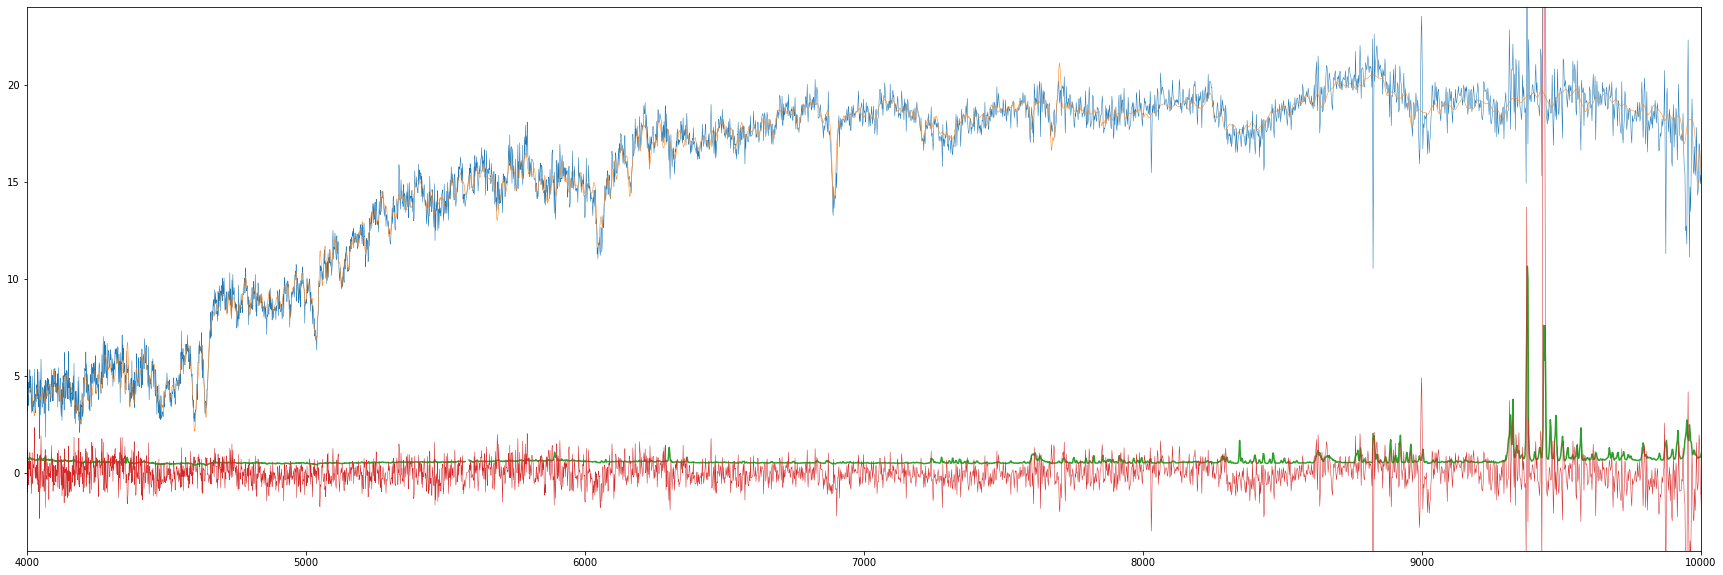

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
ax.plot(10**sp[0][1].data['loglam'], sp[0][1].data['flux'], linewidth = 0.5)
ax.plot(10**sp[0][1].data['loglam'], sp[0][1].data['model'], linewidth = 0.5)
ax.plot(10**sp[0][1].data['loglam'], 1./sp[0][1].data['ivar']**0.5)
ax.plot(10**sp[0][1].data['loglam'], sp[0][1].data['flux'] - sp[0][1].data['model'], linewidth = 0.5)

ax.set_xlim(4000, 10000)
ax.set_ylim(-4, 24)


In [20]:
sp[0][2].columns


ColDefs(
    name = 'PROGRAMNAME'; format = '27A'
    name = 'CHUNK'; format = '14A'
    name = 'PLATEQUALITY'; format = '4A'
    name = 'PLATESN2'; format = 'E'
    name = 'DEREDSN2'; format = 'E'
    name = 'PRIMTARGET'; format = 'J'
    name = 'SECTARGET'; format = 'J'
    name = 'LAMBDA_EFF'; format = 'E'
    name = 'BLUEFIBER'; format = 'J'
    name = 'ZOFFSET'; format = 'E'
    name = 'XFOCAL'; format = 'E'
    name = 'YFOCAL'; format = 'E'
    name = 'BOSS_TARGET1'; format = 'K'
    name = 'BOSS_TARGET2'; format = 'K'
    name = 'ANCILLARY_TARGET1'; format = 'K'
    name = 'ANCILLARY_TARGET2'; format = 'K'
    name = 'EBOSS_TARGET0'; format = 'K'
    name = 'EBOSS_TARGET1'; format = 'K'
    name = 'EBOSS_TARGET2'; format = 'K'
    name = 'EBOSS_TARGET_ID'; format = 'K'
    name = 'THING_ID_TARGETING'; format = 'K'
    name = 'SPECPRIMARY'; format = 'B'
    name = 'SPECBOSS'; format = 'B'
    name = 'BOSS_SPECOBJ_ID'; format = 'J'
    name = 'NSPECOBS'; format = 'I'
    name = 'C

In [15]:
sp[0][2].data['XFOCAL'][0]


-221.5387

In [16]:
sp[0][1].data

FITS_rec([(25.031816, 3.5511, 0.08486009, 0, 0, 1.5010426 , 15.054806 ,  2.3250198),
          (19.694818, 3.5512, 0.        , 0, 0, 1.5011941 , 14.717628 ,  2.3402116),
          (14.356793, 3.5513, 0.09341491, 0, 0, 1.5013392 , 14.091303 ,  2.384717 ),
          ...,
          (23.717148, 4.0146, 0.10242444, 0, 0, 0.8741731 ,  6.891204 , 18.775074 ),
          (18.569954, 4.0147, 0.06044683, 0, 0, 0.8746059 , 14.7481785, 18.865267 ),
          (10.170005, 4.0148, 0.04416137, 0, 0, 0.87503964, 25.922297 , 18.946262 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [17]:
xid['ra'].value, xid['dec'].value

(array([0.00957664]), array([5.28826024]))

In [18]:
sp[0].info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     125   ()      
  1  COADD         1 BinTableHDU     26   4638R x 8C   ['E', 'E', 'E', 'J', 'J', 'E', 'E', 'E']   
  2  SPALL         1 BinTableHDU    488   1R x 236C   ['27A', '14A', '4A', 'E', 'E', 'J', 'J', 'E', 'J', 'E', 'E', 'E', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'B', 'B', 'J', 'I', '5E', '5E', 'J', 'J', 'J', 'J', '7A', '7A', '16A', 'D', 'D', '6A', '21A', 'E', 'E', 'E', 'J', 'E', '24A', '10J', 'J', '10E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'J', '5E', 'E', 'E', '10E', '10E', '10E', '5E', '5E', '5E', '5E', '5E', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', '16A', '9A', '12A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'E', 'E', 'J', 'J', '6A', '21A', 'E', '35E', 'K', '19A', '19A', '19A', 'B', 'B', 'B', 'I', '3A', 'B', 'I', 'I', 'I', 'I', 'J', 'E', 'J', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '5E', '5E', '5E', '5

In [19]:
sp[0][3].data

FITS_rec([(4415, 55831, 476, 'Ly_alpha', 1215.67      , 0.        , -1.00000000e+00,    0.    ,  -1.     ,    0.        ,  -1.       ,  0.0000000e+00, -1.        ,  0.       , -1.        ,  0,  0,  0.      , -1.      ),
          (4415, 55831, 476, 'N_V 1240', 1240.81      , 0.        , -1.00000000e+00,    0.    ,  -1.     ,    0.        ,  -1.       ,  0.0000000e+00, -1.        ,  0.       , -1.        ,  0,  0,  0.      , -1.      ),
          (4415, 55831, 476, 'C_IV 1549', 1549.48      , 0.        , -1.00000000e+00,    0.    ,  -1.     ,    0.        ,  -1.       ,  0.0000000e+00, -1.        ,  0.       , -1.        ,  0,  0,  0.      , -1.      ),
          (4415, 55831, 476, 'He_II 1640', 1640.42      , 0.        , -1.00000000e+00,    0.    ,  -1.     ,    0.        ,  -1.       ,  0.0000000e+00, -1.        ,  0.       , -1.        ,  0,  0,  0.      , -1.      ),
          (4415, 55831, 476, 'C_III] 1908', 1908.734     , 0.        , -1.00000000e+00,    0.    ,  -1.     ,    0.  

In [17]:
sp[0][4].data

FITS_rec([(-0.7397948 , 3.5510354, 0.03339588, 0, 1.5009184 , 10.229514 , 0.9167965, 3620.5564),
          (12.196965  , 3.5511563, 0.02498847, 0, 1.5010995 , 10.588133 , 0.908292 , 3620.557 ),
          ( 0.11435114, 3.551277 , 0.03457476, 0, 1.5012795 , 10.630835 , 0.9004559, 3620.5571),
          ...,
          (23.204153  , 3.79863  , 0.04076145, 0, 0.9835309 ,  5.7553453, 0.5207641, 3633.7517),
          (16.520416  , 3.7987077, 0.04590572, 0, 0.983569  ,  6.9115214, 0.5310378, 3633.764 ),
          (18.988735  , 3.7987854, 0.03981453, 0, 0.98360765,  4.4973354, 0.5413725, 3633.776 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('calib', '>f4'), ('x', '>f4')]))

/home/cheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(-4.0, 24.0)

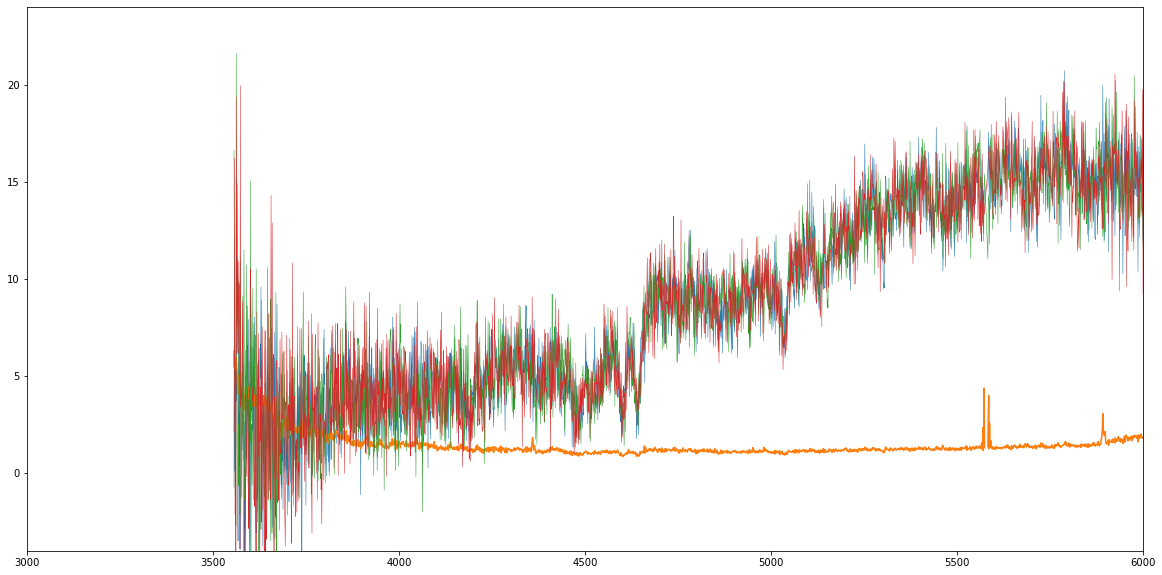

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(10**sp[0][4].data['loglam'], sp[0][4].data['flux'], linewidth = 0.5)
ax.plot(10**sp[0][4].data['loglam'], 1./sp[0][4].data['ivar']**0.5)

ax.plot(10**sp[0][5].data['loglam'], sp[0][5].data['flux'], linewidth = 0.5)
ax.plot(10**sp[0][6].data['loglam'], sp[0][6].data['flux'], linewidth = 0.5)

ax.set_xlim(3000, 6000)
ax.set_ylim(-4, 24)


In [19]:
#I download one spectrum from the SDSS website:
spec = fits.open('spec-4415-55831-0476.fits')
spec.info()

In [ ]:
spec = fits.open('spec-4415-55831-0476.fits')
spec_copy = spec[0:4]

for i in range(data['ra'].shape[0]):
#    if i < 2102: continue
    if os.path.exists('BCG-SDSS-download/'+str(i)+'.fits'): continue
    pos = SkyCoord(data['ra'][i]*u.deg, data['dec'][i]*u.deg, frame='icrs')
    xid = SDSS.query_region(pos, spectro=True)

    if xid == None: continue
    
    if xid['instrument'][0] == 'BOSS':
        xid.remove_column('instrument')
        xid.add_column(name='instrument', col=['EBOSS'])

    if len(xid) > 1:
        print(xid)
        sp = SDSS.get_spectra(matches=xid[0:1], timeout=900)
    if len(xid) == 1: sp = SDSS.get_spectra(matches=xid, timeout=900)
    spec_copy[1].data = sp[0][1].data.copy()
    spec_copy[2].data = sp[0][2].data.copy()
    spec_copy[3].data = sp[0][3].data.copy()
    spec_copy.writeto('BCG-SDSS-download/'+str(i)+'.fits', overwrite = True)
    #np.savetxt(str(i)+'.txt', sp[0][1].data, header = 'flux longlam ivar and_mask or_mask wdisp sky model')

spec_copy.close()
